In [1]:
import numpy as np
from problem_generator import generate_problem_instance

problem_params = {
    "num_entries": 10000,
    "num_bins": 14,
    "pdf_data": np.random.normal,
    "pdf_data_params": (0.0, 4.2),
    "pdf_smear": np.random.normal,
    "pdf_smear_params": (-0.55, 0.49),
    "efficiency": 0.85,
}

seed = None
x, d, R, binning = generate_problem_instance(problem_params, seed=seed)

assert np.allclose(R @ x, d)  # must hold for a valid problem instance

In [2]:
from qunfold import QUnfolder

unfolder = QUnfolder(response=R, measured=d, binning=binning, lam=0)  # no regularization for the moment
unfolder.initialize_qubo_model()

In [3]:
%%timeit
sol_grb_int, _ = unfolder.solve_gurobi_integer()

Restricted license - for non-production use only - expires 2025-11-24
5 ms ± 390 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [4]:
%%timeit
sol_simneal, _ = unfolder.solve_simulated_annealing(num_reads=100)

1.33 s ± 158 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
from time import time

t1 = time()
sol_hybrid, _ = unfolder.solve_hybrid_sampler()  # need token to access D-Wave resources via cloud
t2 = time()

print(round(t2 - t1, 2), "s (include latency to connect to D-Wave Leap via cloud)")

14.29 s (include latency to connect to D-Wave Leap via cloud)


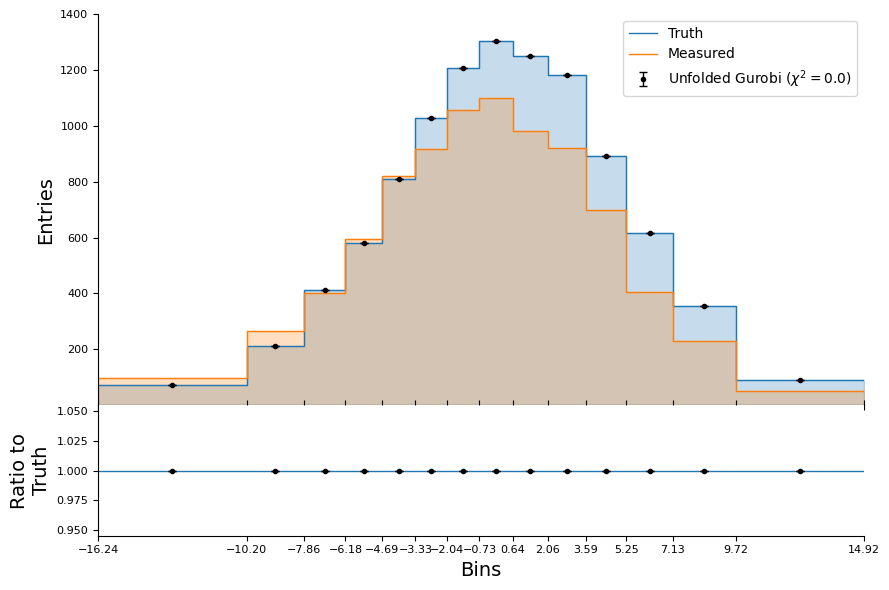

In [6]:
from qunfold import QPlotter

sol_grb_int, _ = unfolder.solve_gurobi_integer()
cov = np.zeros_like(R)  # ignore for the moment

plotter = QPlotter(
    response=R, measured=d, truth=x, unfolded=sol_grb_int, covariance=cov, binning=binning, method="Gurobi"
)

plotter.show_histograms()

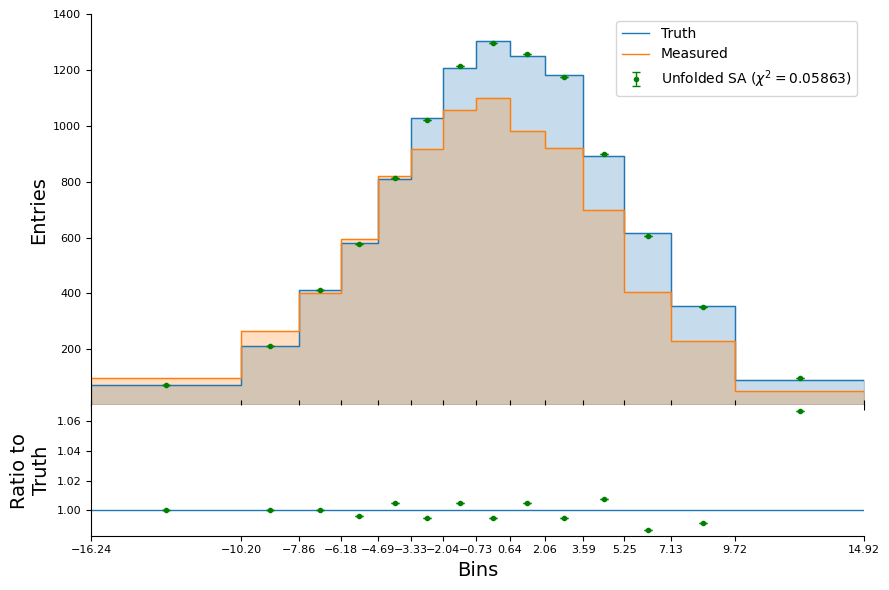

In [7]:
sol_simneal, _ = unfolder.solve_simulated_annealing(num_reads=1000)

plotter = QPlotter(response=R, measured=d, truth=x, unfolded=sol_simneal, covariance=cov, binning=binning, method="SA")

plotter.show_histograms()

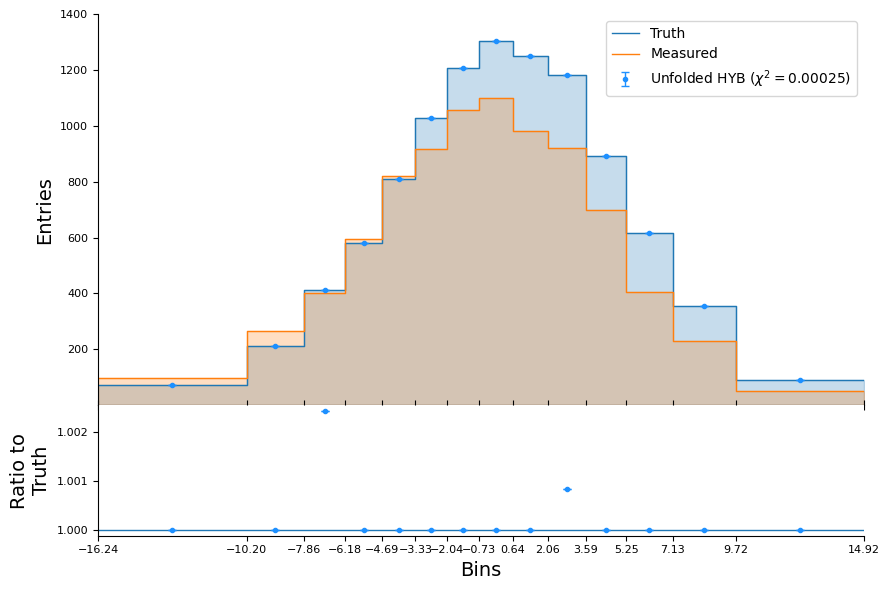

In [8]:
plotter = QPlotter(response=R, measured=d, truth=x, unfolded=sol_hybrid, covariance=cov, binning=binning, method="HYB")

plotter.show_histograms()